# Data Mining Challenge 2020

## Team
* First-name Last-name Student-ID
* ...



# section one 
apply the desired libraries 

In [11]:
import pandas as pd
import numpy as np
import datetime

# Statistical libraries
from scipy import stats

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform


# Evaluation Procedures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Classification methods
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import VotingClassifier

# Evaluation Metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# Section two
Defin the functions that we will use through out our code 

In [3]:
# print the confusion Matrix
def PrintConfusionMatrix(model, true_y, predicted_y, positive=1, negative=-1):
    cm = confusion_matrix(true_y,predicted_y)
    print("\t"+str(model.classes_[0])+"\t"+str(model.classes_[1]))
    print(str(model.classes_[0]) + "\t",cm[0][0],"\t",cm[0][1])
    print(str(model.classes_[1]) + "\t",cm[1][0],"\t",cm[1][1])    

def PrintSignificance(stat, c):
    if (stat[1]<(1-c)):
        print("The difference is statistically significant (cf %3.2f p-value=%.4f)"%(c,stat[1]))
    else:
        print("The difference is not statistically significant (cf %3.2f p-value=%.4f)"%(c,stat[1]))    

In [ ]:
# model training 
def train_model(methods, x_t,y_t, x_te, y_te):
    xval_results = {}
    roc_results = {}
    feature_importance_model = {}

    method = []
    accuracy_mean = []
    accuracy_std = []
    precision = []
    recall = []
    f1 = []
    auc = []

    for method_name in methods:


        clf = methods[method_name];

        # evaluate the model using crossvalidation
        xval_score = cross_val_score(clf,X,y,cv=crossvalidation)

        # store the raw results of crossvalidation that we might want to use for t-test/mann-whitney comparison
        xval_results[method_name] = xval_score

        # compute the basic statistics
        accuracy_mean.append(np.average(xval_score))
        accuracy_std.append(np.std(xval_score))

        clf.fit(x_t,y_t)

        # if the mode can return an evaluation of feature importance we store it to analyze it later
        if hasattr(clf, 'feature_importances_'):
                feature_importance_model[method_name] = (clf,clf.feature_importances_)

        # compute the prediction which, for probabilistic classifiers, is using a threshold of 0.5
        yp = clf.predict(x_te)

        # ask for the probability values
        yprob = clf.predict_proba(x_te)

        # computes the data needed to draw the ROC curve
        fpr_nb, tpr_nb, thresholds = roc_curve(y_true=y_te, y_score = yprob[:,1], pos_label=1)

        # computes the AUC 
        roc_auc = roc_auc_score(y_true=y_te, y_score = yprob[:,1])
        auc.append(roc_auc)

        # store the information to plot the ROC curves afterwards
        roc_results[method_name] = (fpr_nb, tpr_nb, thresholds, roc_auc)

        precision.append(precision_score(y_te,yp))
        recall.append(recall_score(y_te,yp))
        f1.append(f1_score(y_te, yp))

        print("%40s"%method_name)
        print("========================================")
        print("\t  Accuracy (CV) %.3f %.3f"%(np.average(xval_score),np.std(xval_score)))
        print("\tAccuracy (Test) %.3f"%precision_score(y_test, yp))
        print("\t      Precision %.3f"%precision_score(y_test, yp))
        print("\t      Recall    %.3f"%recall_score(y_test, yp))
        print("\t      F1        %.3f"%f1_score(y_test, yp))
        print("\n")

        method.append(method_name)

This function print all the datas 

In [ ]:
def print_all (to_print):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(to_print)

In [ ]:
def print_his(dat0a, bins):
    hist1 = sns.distplot(data,bins=bins)

In [49]:
def new_numerical_df(numerical_dic, Numerical_df):
  i = 0
  while(i<len(numerical_dic)):
    if list(numerical_dic.keys())[i] == 'aircon_sum_wo_prev':
      index=2
    else:
      index = 3
    
    df_new = Numerical_df[Numerical_df.columns[(list(numerical_dic.values())[i]):(list(numerical_dic.values())[i]+index)]]
    Numerical_df['ind_' + list(numerical_dic.keys())[i]] = df_new.mean(axis=1)

    i= i+1


  # Numerical_df = Numerical_df.drop(columns = ['aircon_sum_wo_prev7d','aircon_sum_wo_prev14d'])
  Numerical_df=Numerical_df.drop(Numerical_df.columns.to_series()['aircon_sum_wo_prev7d':'min_pressure_f_next7d'], axis=1)
  return Numerical_df


# Section Three 
Apply data preprocessing we can see that the categorical datas are already One-Hot encoded 

### 3.1 loading the data and split test and train

In [9]:
# load the data
df = pd.read_csv('train.csv')

### 3.2 Data Quality assurnace 
we should check for:

3.2.1- null and missing values 

3.2.2- inconsistant values 

3.2.3- duplicates

Date encodes a lot of information that is unusable when contained in one variable. So first, let's extract all the information.

In [12]:
df['month'] = df['DATE'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").month)  
df['year'] = df['DATE'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").year)                                                                         
df['weekday'] = df['DATE'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").weekday())

In [ ]:
# check for the null 
df_na = (df.isnull().sum()).sort_values(ascending = False)
df_na = df_na.drop(df_na[df_na.values == 0].index)

Missing_data = pd.DataFrame({'Missing Numbers' :df_na})
print(Missing_data)

we see that there are no NaN values

In [17]:
# remove the duplicates if any 
df.drop_duplicates()
# drop the unused columns
df = df.drop(columns=['SITE_ID','DATE'])

we the commad above we have no duplicates if any 

Now we check for inconsistent values
First we take the range and variance for each column 

In [ ]:
col_max = df.max(axis=0)

In [19]:
col_min = df.min(axis=0)

In [ ]:
df_range = col_max - col_min
print(df_range.sort_values())

we see that CELL_TYPE_TRP is always zero so it is useless to have it in our datas so we drop it

In [ ]:
df = df.drop(columns = ['CELL_TYPE_TRP'])

In [24]:
df_mean = df.mean()
print(df_mean.sort_values())

kurt_ge_alarms_prev14d               -1.208560
kurt_fire/smoke_alarms_prev14d       -1.207841
kurt_temperature_alarms_prev14d      -1.198327
kurt_equipment_alarms_prev14d        -1.190338
kurt_power_alarms_prev14d            -1.149931
                                      ...     
max_pressure_prev3d                1019.379032
max_pressure_prev7d                1022.048299
max_pressure_f_next7d              1022.172576
max_pressure_f_next14d             1024.813536
year                               2019.113295
Length: 137, dtype: float64


In [26]:
df_var = df.var()
df_var.sort_values()

CELL_TYPE_Mobil                             0.000000
CELL_TYPE_TRP                               0.000000
GEOGRAPHIC_CLUSTER_K_9                      0.000000
GEOGRAPHIC_CLUSTER_K_0                      0.000000
GEOGRAPHIC_CLUSTER_K_3                      0.000000
                                           ...      
equipment_max_persistance_prev3d        75484.922860
temperature_mean_persistance_prev3d     79314.004293
equipment_max_persistance_prev7d       170353.390543
temperature_max_persistance_prev3d     185816.886139
temperature_max_persistance_prev7d     295313.915387
Length: 137, dtype: float64

In [ ]:
df_std = df.std()
df_std.sort_values()

Data can be inconsistent if there is an irrelevant value so we should print all of them to se if there is some inconsistency 

In [ ]:
df_sem = df.sem()
df_sem.sort_values()

from the statistics above we can understand that it is possible that we have outliers so first we check if there is any Inconsistentcy in the types of the data and then we plot to understand better how can we remove the outliers 

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.dtypes)

As we can see there are no inconsistentcies in the types sp we continue with data visualisation 

### 3.3 Data visualisation

In here first we try to visualize our data and understand better their distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b297c18d0>,
      dtype=object)

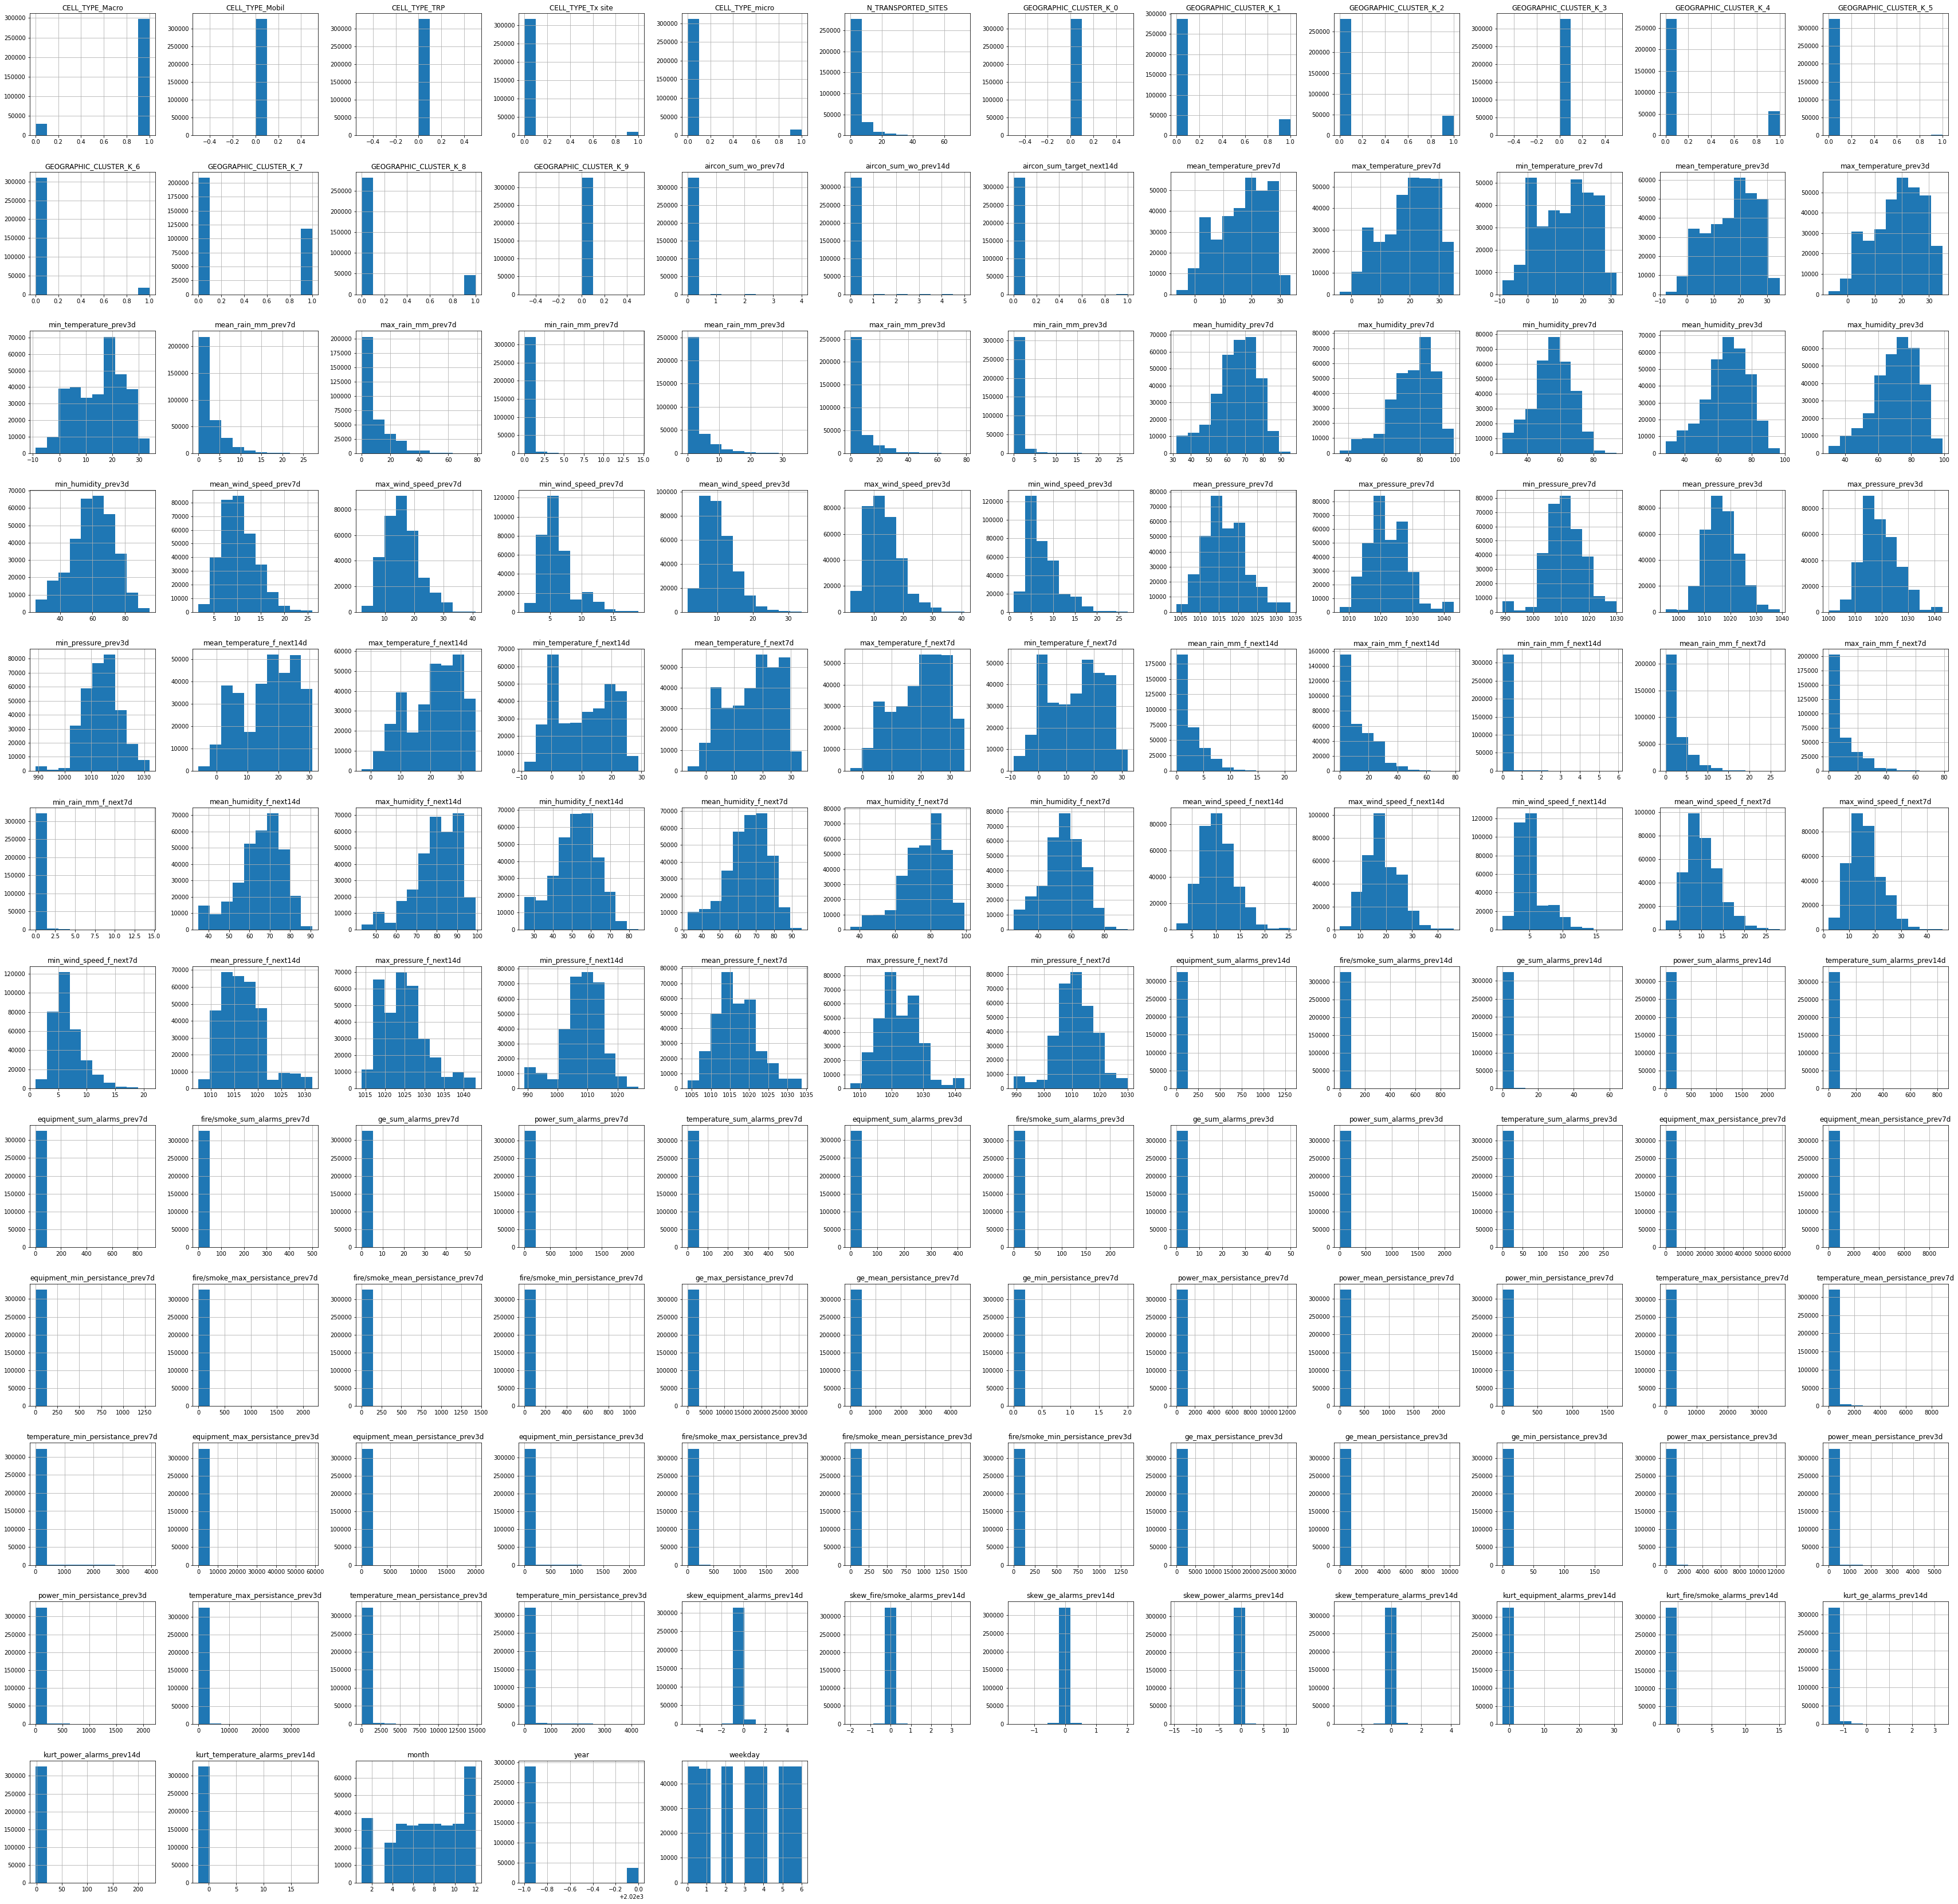

In [27]:
df.hist(figsize = (60,60))

as we can see all the datas does not have Gaussian like distibution so using the 'yeo-johnson' we make them as much as possible to gain the Gaussian like distribution.

since our categorical data had the one hot encoding transformation we need to remove the 

In [28]:
new_data = df.copy(deep=True)
new_data = new_data.drop(columns= ['CELL_TYPE_Macro','CELL_TYPE_Mobil','CELL_TYPE_Tx site','CELL_TYPE_micro','GEOGRAPHIC_CLUSTER_K_0','GEOGRAPHIC_CLUSTER_K_1','GEOGRAPHIC_CLUSTER_K_2','GEOGRAPHIC_CLUSTER_K_3','GEOGRAPHIC_CLUSTER_K_4','GEOGRAPHIC_CLUSTER_K_5','GEOGRAPHIC_CLUSTER_K_6','GEOGRAPHIC_CLUSTER_K_7','GEOGRAPHIC_CLUSTER_K_8','GEOGRAPHIC_CLUSTER_K_9'])
new_data_np = power_transform(new_data, method = 'yeo-johnson')
new_data_pd = pd.DataFrame(new_data_np, columns =new_data.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b27a4ef60>,
      dtype=object)

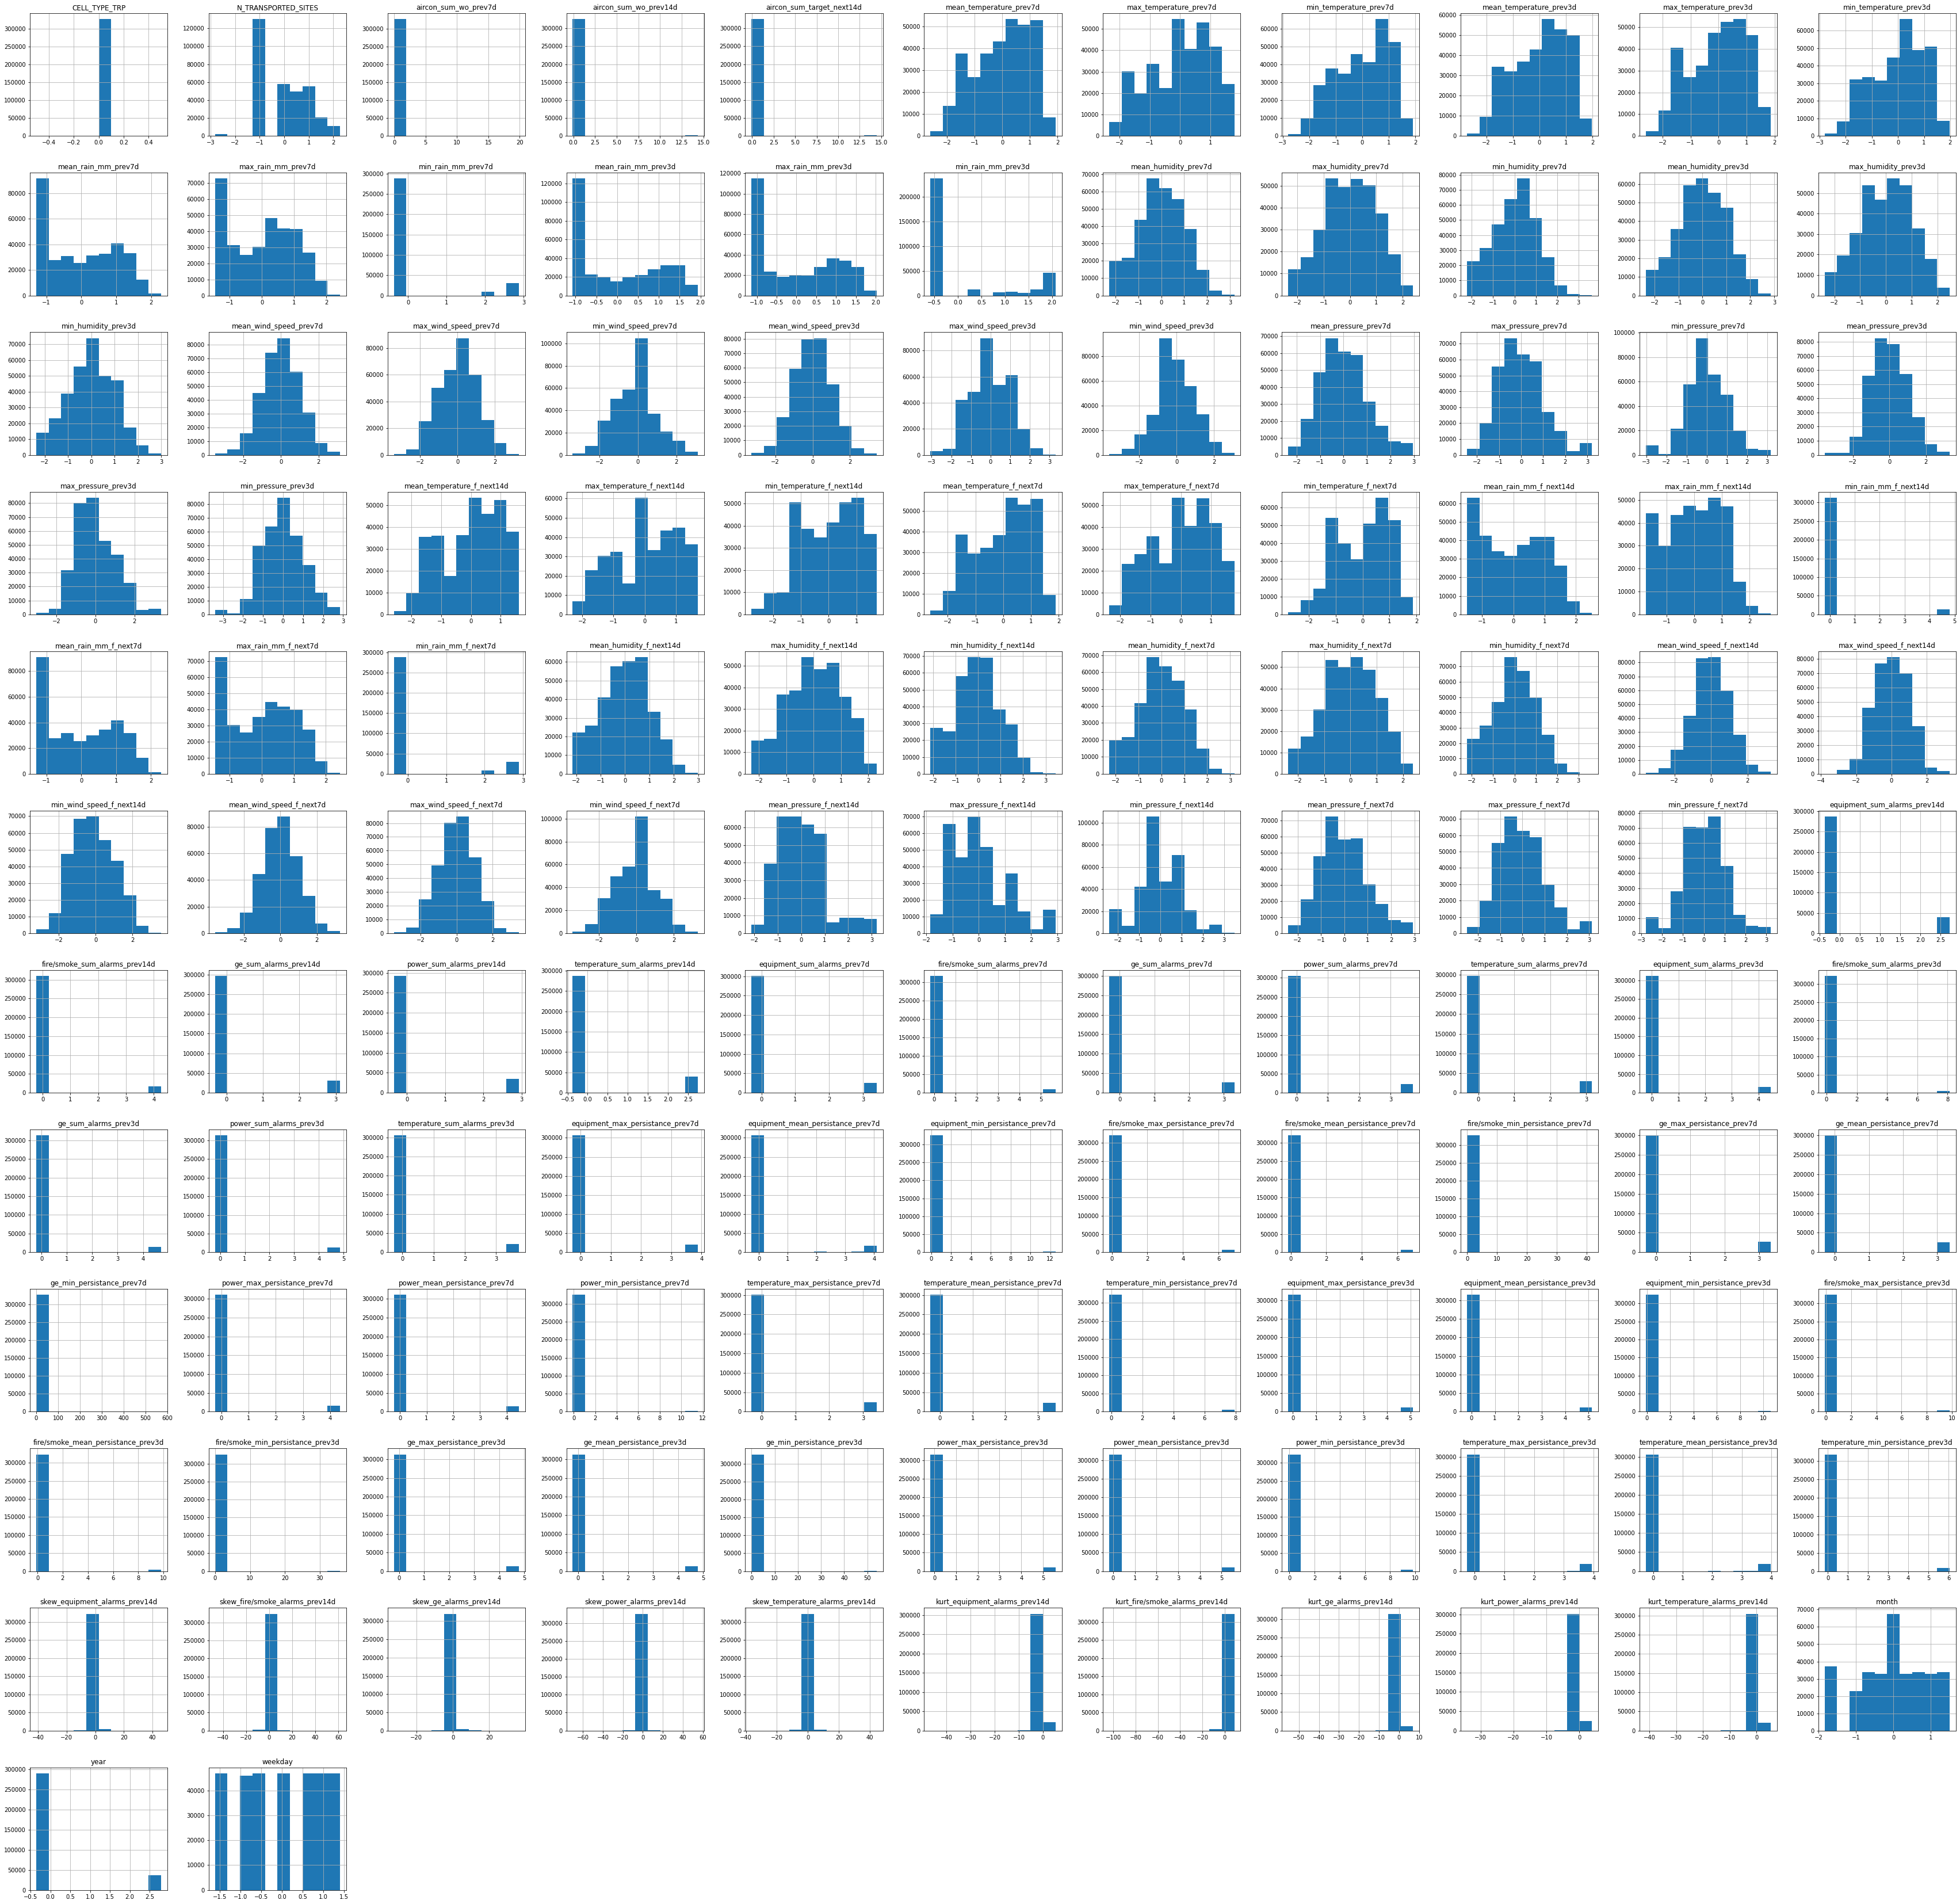

In [29]:
new_data_pd.hist(figsize=(60,60))

### 3.4 feature aggregation 

Get all mean, max and min values for the same numerical variables belonging to prevXd or nextXd and do a function in order to have one indicatioe columns instead of 3 columns

In [50]:
numerical_dic = {'temperature_prev7d':3,'temperature_prev3d':6, 'rain_mm_prev7d': 9, 'rain_mm_prev3d': 12, 'humidity_prev7d' : 15,'humidity_prev3d':18, 'wind_speed_prev7d':21 , 'wind_speed_prev3d':24, 'wind_speed_prev7d' : 27, 'wind_speed_prev3d': 30, 'pressure_prev7d':33, 'pressure_prev3d': 36, 'temperature_f_next14d': 39, 'temperature_f_next7d': 42, 'rain_mm_f_next14d':45, 'rain_mm_f_next7d':48, 'humidity_f_next14d':51, 'humidity_f_next7d' : 54, 'speed_f_next14d':57, 'speed_f_next7d':60, 'pressure_f_next14d':63, 'pressure_f_next7d':66,       }
Numerical_df = df.loc[: , 'aircon_sum_wo_prev7d':'min_pressure_f_next7d']


In [51]:
New_Numerical_sort_by_same_preXd = new_numerical_df(numerical_dic, Numerical_df)

In [52]:
New_Numerical_sort_by_same_preXd

,ind_temperature_prev7d,ind_temperature_prev3d,ind_rain_mm_prev7d,ind_rain_mm_prev3d,ind_humidity_prev7d,ind_humidity_prev3d,ind_wind_speed_prev7d,ind_wind_speed_prev3d,ind_pressure_prev7d,ind_pressure_prev3d,ind_temperature_f_next14d,ind_temperature_f_next7d,ind_rain_mm_f_next14d,ind_rain_mm_f_next7d,ind_humidity_f_next14d,ind_humidity_f_next7d,ind_speed_f_next14d,ind_speed_f_next7d,ind_pressure_f_next14d,ind_pressure_f_next7d
0,10.096667,11.666667,3.276667,3.966667,62.903333,69.890000,1013.666667,1008.000000,8.333333,6.713333,8.163333,8.736667,73.763333,77.333333,11.620000,13.620000,1019.236667,1015.046667,8.346667,45.586667
1,12.236667,12.666667,3.466667,4.356667,66.143333,75.666667,1011.286667,1007.000000,9.833333,6.286667,5.373333,5.776667,73.310000,77.286667,11.523333,13.430000,1020.903333,1019.570000,9.456667,48.722222
2,12.190000,12.666667,8.100000,9.290000,72.570000,78.776667,1010.236667,1007.443333,11.453333,7.430000,5.410000,6.103333,73.000000,76.810000,11.430000,13.523333,1022.046667,1021.190000,10.985556,53.545556
3,11.763333,11.666667,8.123333,9.376667,73.430000,79.776667,1009.476667,1009.890000,12.523333,7.620000,5.333333,5.990000,72.356667,75.713333,11.380000,13.046667,1020.620000,1022.430000,10.517778,54.194444
4,10.523333,7.110000,8.430000,9.410000,74.430000,85.333333,1010.620000,1012.556667,12.833333,8.286667,5.363333,5.976667,72.023333,74.953333,11.213333,11.236667,1019.430000,1023.000000,8.687778,56.391111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326981,-1.713333,-0.556667,0.000000,0.000000,83.666667,80.000000,1026.713333,1028.333333,-0.810000,-1.666667,2.690000,0.813333,74.070000,72.236667,6.333333,6.903333,1024.523333,1033.953333,-0.756667,54.555556
326982,-0.046667,0.110000,0.000000,0.000000,79.476667,69.890000,1027.190000,1029.110000,-0.786667,-1.713333,2.813333,0.813333,74.143333,72.096667,6.430000,6.476667,1024.070000,1033.856667,0.021111,49.788889
326983,-0.046667,1.443333,0.000000,0.000000,78.620000,69.000000,1028.620000,1031.000000,-0.403333,-2.476667,2.866667,0.813333,78.403333,75.903333,6.403333,6.236667,1023.736667,1031.953333,0.465556,49.206667
326984,0.096667,1.556667,0.000000,0.000000,72.286667,62.556667,1029.430000,1030.110000,0.430000,-1.286667,2.880000,0.813333,78.810000,77.046667,6.546667,6.190000,1023.356667,1031.713333,0.551111,44.947778


Split the origin DataFrame to subdataframes and sort them according to the duration days (3,7,14)

In [76]:
categorical_df = df.loc[: ,'CELL_TYPE_Macro':'CELL_TYPE_micro'] + df.loc[: ,'GEOGRAPHIC_CLUSTER_K_0':'GEOGRAPHIC_CLUSTER_K_9']
aircon_sum_wo_df = df.loc[:, 'aircon_sum_wo_prev7d' : 'aircon_sum_target_next14d']
N_TRANSPORTED_SITES_df = df.loc[:,'N_TRANSPORTED_SITES']
Numerical_df = df.loc[: , 'mean_temperature_prev7d':'min_pressure_f_next7d']
Numerical_df = Numerical_df.reindex(sorted(Numerical_df.columns, reverse=True), axis=1)
alarm_df = df.loc[: , 'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
persistance_df = (df.loc[:, 'equipment_max_persistance_prev7d': 'temperature_min_persistance_prev3d'])
persistance_df = persistance_df.reindex(sorted(persistance_df.columns, reverse=True), axis=1)
skewKurt_df = df.loc[:,'skew_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']

Get all values for the same numerical variables in different time and do a mean function in order to have one indicatioe columns instead of 4 columns

In [77]:
index=0
incr_index = 4
counter = (Numerical_df.shape)[1]
New_Numerical_df = Numerical_df.copy()
while(index<counter):
  df_new = New_Numerical_df.iloc[:,index:index+incr_index]
  New_Numerical_df['ind_'+list(New_Numerical_df.columns)[index]] = df_new.mean(axis=1)
  index = index + 4

New_Numerical_df=New_Numerical_df.drop(New_Numerical_df.columns.to_series()['min_wind_speed_prev7d':'max_humidity_f_next14d'], axis=1)
New_Numerical_df

,ind_min_wind_speed_prev7d,ind_min_temperature_prev7d,ind_min_rain_mm_prev7d,ind_min_pressure_prev7d,ind_min_humidity_prev7d,ind_mean_wind_speed_prev7d,ind_mean_temperature_prev7d,ind_mean_rain_mm_prev7d,ind_mean_pressure_prev7d,ind_mean_humidity_prev7d,ind_max_wind_speed_prev7d,ind_max_temperature_prev7d,ind_max_rain_mm_prev7d,ind_max_pressure_prev7d,ind_max_humidity_prev7d
0,6.25,6.25,0.150,1007.50,56.00,11.5375,9.1075,3.9075,1014.4625,71.9175,15.50,12.25,14.050,1020.00,85.00
1,6.25,7.00,0.150,1009.50,60.75,11.3575,9.7675,3.5800,1014.5700,73.5550,15.50,14.00,10.500,1020.00,85.00
2,6.25,7.00,0.150,1011.00,62.50,12.0600,10.0550,5.4775,1014.9375,74.8675,16.25,15.75,16.050,1019.75,88.50
3,7.75,6.50,0.200,1010.50,62.50,12.5100,9.9300,5.3675,1015.8125,74.9575,16.25,16.25,16.050,1020.50,88.50
4,6.75,5.00,0.275,1010.50,65.25,11.8850,9.3150,5.5600,1016.7050,76.3050,16.00,14.75,16.050,1022.00,88.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326981,2.00,-4.25,0.000,1021.25,62.00,3.7125,-1.0600,0.3025,1028.3925,79.9800,7.50,1.75,2.325,1035.50,90.50
326982,1.75,-3.50,0.000,1021.25,57.00,3.7150,-0.5775,0.3950,1028.4200,77.2050,7.50,2.25,2.325,1036.00,87.50
326983,2.00,-2.75,0.000,1021.25,62.00,3.7900,-0.3625,0.4350,1028.7325,77.4450,8.00,2.00,2.325,1036.50,87.00
326984,2.00,-2.75,0.000,1021.25,56.00,4.3850,0.0975,0.4450,1028.2075,75.2750,9.50,3.25,2.325,1036.50,86.75


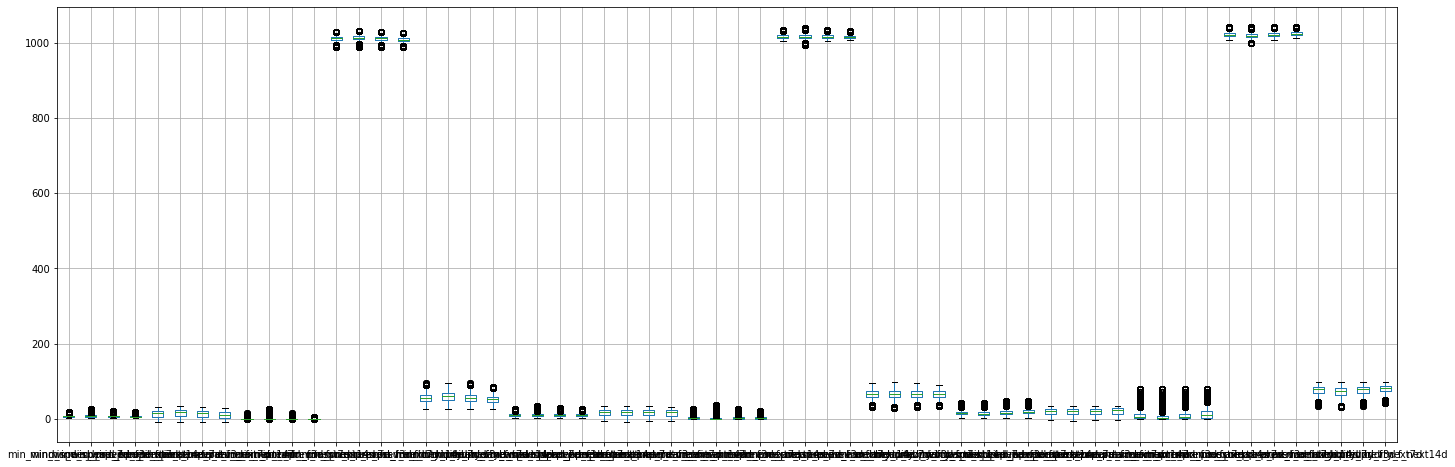

In [78]:
Numerical_df.boxplot(figsize=(24,8));

In [ ]:
# defining the targer and input
target_variable = 'aircon_sum_target_next14d'
input_variables = df.columns[df.columns!=target_variable]

X = df[input_variables]
y = df[target_variable]

In [ ]:
# seed the random set to be consistant 
np.random.seed(1234)
# do the train test splitting
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,\
    test_size= 1/3.0, random_state =1234, shuffle=True)
# cross validation using k-fold here 10
crossvalidation = StratifiedKFold(n_splits=10, shuffle=True)

2- do two different set for standardization and normalization for sake of comparison

In [ ]:
st_x= StandardScaler()
X_train_standard = st_x.fit_transform(X_train) 
X_test_standard = st_x.fit_transform(X_test) 

In [ ]:
norm_x = MinMaxScaler()
X_train_norm = norm_x.fit_transform(X_train)
X_test_norm = norm_x.fit_transform(X_test)

# Section 4
specifying the model and train

In [ ]:
n_estimators = 50

methods = {
#     'Lasso':LogisticRegression(penalty="l1",C=100, random_state=1234, max_iter=300, solver="liblinear"),
#     'NaiveBayes':GaussianNB(),
#     'k-NN(5)':KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree'),
    'Decision Tree':DecisionTreeClassifier(max_depth=None),
#     'Bagging(Tree)':BaggingClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators),
#     'Bagging(kNN)':BaggingClassifier(KNeighborsClassifier(n_neighbors=10, algorithm='kd_tree'),n_estimators=n_estimators),
#     'Random Forest':RandomForestClassifier(n_estimators=n_estimators,max_depth=3,oob_score=True),
#     'Extremely Randomized Trees':ExtraTreesClassifier(n_estimators=n_estimators,max_depth=3),
#     'Ada Boost':AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators)
}

## Desision Tree
here we do three different comparisions 

In [ ]:
train_model(methods, X_train, y_train, X_test, y_test)

                           Decision Tree
	  Accuracy (CV) 0.996 0.000
	Accuracy (Test) 0.517
	      Precision 0.517
	      Recall    0.468
	      F1        0.492




In [ ]:
train_model(methods, X_train_standard,y_train, X_test_standard, y_test)

                           Decision Tree
	  Accuracy (CV) 0.996 0.000
	Accuracy (Test) 0.269
	      Precision 0.269
	      Recall    0.401
	      F1        0.322




In [ ]:
train_model(methods, X_train_norm,y_train, X_test_norm, y_test)

                           Decision Tree
	  Accuracy (CV) 0.996 0.000
	Accuracy (Test) 0.219
	      Precision 0.219
	      Recall    0.263
	      F1        0.239




## Result 
based on these three evaluation normalization is not a good approach for tree if we want to use tree we have to think of better cleaning the features. 